In [11]:
import os
import json
import pgmpy
from pgmpy.readwrite import NETReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from experiment_utils import credit_pipeline

filedir = os.path.join(os.getcwd())
pardir = os.path.abspath(os.path.join(filedir, os.pardir))


DATASET_NAME = 'credit10k'
TARGET_COL = 'CreditWorthiness'
ID = 4

MODEL_NET_PATH = os.path.join(filedir, 'models')
ARTIFACTS_PATH = os.path.join(filedir, 'artifacts', f'{DATASET_NAME}_{ID}_artifacts')
DATASET_FILEPATH = os.path.join(filedir, 'data', f'{DATASET_NAME}.csv')
RULES_FILEPATH = os.path.join(filedir, f'rules_{DATASET_NAME}.json')
ODD_FILEPATH = os.path.join(pardir, 'odd_models', f'{DATASET_NAME}_{ID}.odd')

print(f'filedir: {filedir}')
print(f'DATASET_PATH: {DATASET_FILEPATH}')
print(f'MODEL_NET_PATH: {MODEL_NET_PATH}')
print(f'ARTIFACTS_PATH: {ARTIFACTS_PATH}')
print(f'RULES_PATH: {RULES_FILEPATH}')
print(f'ODD_PATH: {ODD_FILEPATH}')

filedir: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall
DATASET_PATH: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall/data/credit10k.csv
MODEL_NET_PATH: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall/models
ARTIFACTS_PATH: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall/artifacts/credit10k_4_artifacts
RULES_PATH: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall/rules_credit10k.json
ODD_PATH: /home/ignacy/cmu/bnc-formal-verification/src/odd_models/credit10k_4.odd


In [12]:
data = pd.read_csv(DATASET_FILEPATH)
data.head()

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
0,Without_Reference,Unstable,Unreliable,a0_11100,s70001_more,Favorable,wealthy,High,Medium_income_profession,Promissing,a16_21,Negative
1,Aceptable,Unjustified_no_work,Unreliable,a0_11100,s70001_more,Favorable,average,High,Medium_income_profession,Promissing,a66_up,Negative
2,Aceptable,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,wealthy,High,Low_income_profession,Not_promissing,a16_21,Negative
3,Excellent,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,average,Medium,Medium_income_profession,Not_promissing,a16_21,Negative
4,Excellent,Unjustified_no_work,Unreliable,a11101_25900,s0_30000,Unfavorable,average,Low,Medium_income_profession,Not_promissing,a66_up,Negative


In [13]:
train, test, TARGET_COL = credit_pipeline(data)

data_preprocessed = pd.concat([train, test], axis=0)

#sort by index
data_preprocessed = data_preprocessed.sort_index()

data_preprocessed.head()

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
0,0,1,0,0,2,1,2,2,1,1,0,0
1,2,0,0,0,2,1,1,2,1,1,2,0
2,2,1,1,2,1,0,2,2,0,0,0,0
3,3,1,1,2,1,0,1,1,1,0,0,0
4,3,0,0,1,0,0,1,0,1,0,2,0


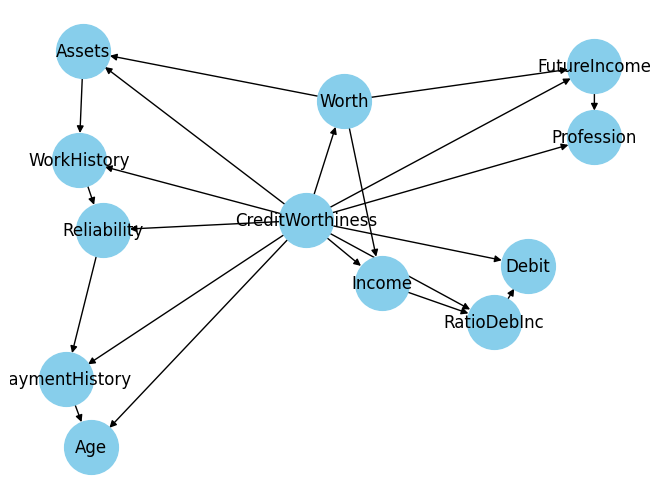

<Figure size 1300x1000 with 0 Axes>

In [14]:
model = NETReader(path=os.path.join(MODEL_NET_PATH, f'{DATASET_NAME}_{ID}.net')).get_model()

# Plot the model
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G, seed=1)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue")
plt.figure(figsize=(13, 10))
plt.show()

In [15]:
model.get_cpds()

[<TabularCPD representing P(Age:3 | CreditWorthiness:2, PaymentHistory:4) at 0x7efea3b1caf0>,
 <TabularCPD representing P(Assets:3 | CreditWorthiness:2, Worth:3) at 0x7efea3b1f190>,
 <TabularCPD representing P(CreditWorthiness:2) at 0x7efea3b1e830>,
 <TabularCPD representing P(Debit:3 | CreditWorthiness:2, RatioDebInc:2) at 0x7efea3b1c1c0>,
 <TabularCPD representing P(FutureIncome:2 | CreditWorthiness:2, Worth:3) at 0x7efea3b1c5e0>,
 <TabularCPD representing P(Income:3 | CreditWorthiness:2, Worth:3) at 0x7efea3b1c3d0>,
 <TabularCPD representing P(PaymentHistory:4 | CreditWorthiness:2, Reliability:2) at 0x7efea3b1d630>,
 <TabularCPD representing P(Profession:3 | CreditWorthiness:2, FutureIncome:2) at 0x7efea3b1e1a0>,
 <TabularCPD representing P(RatioDebInc:2 | CreditWorthiness:2, Income:3) at 0x7efea3b1c640>,
 <TabularCPD representing P(Reliability:2 | CreditWorthiness:2, WorkHistory:4) at 0x7efea3b1c5b0>,
 <TabularCPD representing P(WorkHistory:4 | Assets:3, CreditWorthiness:2) at 0x7e

In [16]:
data_preprocessed

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
0,0,1,0,0,2,1,2,2,1,1,0,0
1,2,0,0,0,2,1,1,2,1,1,2,0
2,2,1,1,2,1,0,2,2,0,0,0,0
3,3,1,1,2,1,0,1,1,1,0,0,0
4,3,0,0,1,0,0,1,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,0,0,0,0,2,2,2,1,0,0
9996,1,2,0,2,1,0,0,1,1,0,2,0
9997,1,2,0,1,1,1,0,1,2,1,0,0
9998,2,3,1,0,1,1,1,1,1,1,1,1


In [17]:
# # ignore watnings
# import warnings
# warnings.filterwarnings('ignore')

# # Do inference on the model
# predictions = model.predict(data_preprocessed.drop(columns=[TARGET_COL]))
# predictions

In [18]:
with open(RULES_FILEPATH) as f:
    rules = json.load(f)
    
print(f'Number of rules: {len(rules)}')

Number of rules: 11


In [19]:
# LOAD ARTIFACTS IFTHEN Artifacts
ifthen_results_dict = {}
with open(os.path.join(ARTIFACTS_PATH, f'ifthen_{DATASET_NAME}.json')) as f:
    ifthen_results_dict = json.load(f)

In [20]:
with open(ODD_FILEPATH) as f:
    d = f.readline().replace('[', '').replace(']', '').split(',')
    d[-1] = d[-1][:-1]
    
    variables_order = [x.strip() for x in d]
    
    print(f'Number of variables: {len(variables_order)}')
    print(f'Variables: {variables_order}')
    

Number of variables: 3
Variables: ['Profession', 'Debit', 'Age']


In [21]:
def transform_mdd_names_back(variable_list: list[str]) -> list[str]:
    transformed_list = []
    variables = {}
    
    with open(ODD_FILEPATH) as f:
        d = f.readline().replace('[', '').replace(']', '').split(',')
        d[-1] = d[-1][:-1]
        
        variables_order = [x.strip() for x in d]
    
    
    for var in variable_list:
        if var.startswith('Node'):
            name = var.split('_')[1]
            
            if 'TRUE' in name or 'FALSE' in name:
                continue
            
            order_index = variables_order.index(name) + 1 # +1 because variable index in odd starts at 1
            
            s = f'x_{order_index}'
            
            for var2 in variable_list:
                if var2.startswith(s):
                    value = int(var2.split('=')[1].split('th')[0])
                    
                    transformed_list.append(f'{name}={value}th')
                    break
            
            
            
            # for var2 in variable_list:
            #     if var2.startswith(f'x_{index}'):
            #         value = int(var2.split('=')[1].split('th')[0])
                    
            #         transformed_list.append(f'{name}={value}th')
            #         break
    
    return transformed_list
    

In [22]:
df = pd.DataFrame(rules)
print(f'Number of rules: {len(rules)}')

if_then_results_SAT = []
if_then_results_Exectime = []
if_then_results_truevars = []
if_then_results_falsevars = []
if_then_results_sat_models = []

for idx in df.index:
    # print(ifthen_results_dict[f'Verification case #IfThen#{idx}'])
    if_then_results_SAT.append(ifthen_results_dict[f'Verification case #IfThen#{idx}']['is_UNSAT'])
    if_then_results_Exectime.append(ifthen_results_dict[f'Verification case #IfThen#{idx}']['exec_time'])
    if_then_results_truevars.append(transform_mdd_names_back(ifthen_results_dict[f'Verification case #IfThen#{idx}']['true_variables']))
    if_then_results_falsevars.append(transform_mdd_names_back(ifthen_results_dict[f'Verification case #IfThen#{idx}']['false_variables']))
    if_then_results_sat_models.append(ifthen_results_dict[f'Verification case #IfThen#{idx}']['all_sat_models'])
    
df['ifthen_UNSAT'] = if_then_results_SAT  
df['ifthen_Exec_Time (ms)'] = if_then_results_Exectime
df['ifthen_True_Vars'] = if_then_results_truevars
df['ifthen_False_Vars'] = if_then_results_falsevars
df['ifthen_All_SAT_Models'] = if_then_results_sat_models


df.head(15)

Number of rules: 11


,rule,class,coverage,ifthen_UNSAT,ifthen_Exec_Time (ms),ifthen_True_Vars,ifthen_False_Vars,ifthen_All_SAT_Models
0,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.007,True,0.001441,[],[],[]
1,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.003,True,0.001327,[],[],[]
2,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.003,True,0.001543,[],[],[]
3,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.002112,"[Profession=0th, Debit=0th, Age=1th]","[Debit=1th, Debit=1th, Age=0th, Age=0th, Age=0th]","[{'true_variables': ['Node_Profession_1', 'Nod..."
4,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.001130,"[Profession=0th, Debit=0th, Age=0th]","[Debit=1th, Debit=1th, Age=1th, Age=1th, Age=1th]","[{'true_variables': ['Node_Profession_1', 'Nod..."
5,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,True,0.001038,[],[],[]
6,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,False,0.001245,"[Profession=0th, Debit=0th, Age=0th]","[Debit=1th, Debit=1th, Age=1th, Age=1th, Age=1th]","[{'true_variables': ['Node_Profession_1', 'Nod..."
7,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,True,0.001174,[],[],[]
8,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.003,True,0.001121,[],[],[]
9,"[[FutureIncome, >, 0.0], [Reliability, >, 0.0]...",1,0.002,True,0.001373,[],[],[]


In [23]:
# Print how many rules are SAT and UNSAT
print(f'Number of SAT rules: {len(df[df["ifthen_UNSAT"] == False])}')
print(f'Number of UNSAT rules: {len(df[df["ifthen_UNSAT"] == True])}')
print('Bear in mind that UNSAT means that the model is adherent to the rule. (proof by contradiction)')

Number of SAT rules: 4
Number of UNSAT rules: 7
Bear in mind that UNSAT means that the model is adherent to the rule. (proof by contradiction)


In [24]:
# UNSAT RULES
with open('expert_rules.json', 'r') as f:
    old = json.load(f)
new = old + [{'rule': x['rule'], 'class': x['class'], 'coverage': x['coverage']} for _, x in df[df['ifthen_UNSAT'] == True].iterrows()]
with open('expert_rules.json', 'w') as f:
    json.dump(new, f, indent=4)

In [25]:
with open('expert_rules.json', 'r') as f:
    rules = json.load(f)
    # deduplicate
    rules = [(tuple([(a,b,c) for a,b,c in x['rule']]), x['class'], x['coverage']) for x in rules]
    rules = list(set(rules))
    rules = [{'rule': x[0], 'class': x[1], 'coverage': x[2]} for x in rules]
    
    print(f'Number of rules: {len(rules)}')
    
with open('expert_rules_dedup.json', 'w') as f:
    json.dump(rules, f, indent=4)

Number of rules: 11


In [26]:
def print_rule(rule_dict: dict) -> None:

    print(f'Rule: {rule_dict["rule"]}')
    print(f'Outcome: {rule_dict["class"]}')
    print(f'Ifthen Verification result: {rule_dict["ifthen_UNSAT"]}')


    print(f'True variables - names: {rule_dict["ifthen_True_Vars"]}')
    print(f'False variables - names: {rule_dict["ifthen_False_Vars"]}')

In [27]:
print_rule(df.iloc[0].to_dict())

Rule: [['FutureIncome', '>', 0.0], ['Reliability', '>', 0.0], ['RatioDebInc', '>', 0.0], ['Age', '<=', 1.0], ['Debit', '>', 0.0], ['Profession', '<=', 0.0], ['Assets', '<=', 1.0]]
Outcome: 1
Ifthen Verification result: True
True variables - names: []
False variables - names: []


In [28]:
from experiment_utils import credit10k_translation_table

credit10k_translation_table

{'PaymentHistory': {'Without_Reference': 0,
  'NoAceptable': 1,
  'Aceptable': 2,
  'Excellent': 3},
 'WorkHistory': {'Unjustified_no_work': 0,
  'Unstable': 1,
  'Justified_no_work': 2,
  'Stable': 3},
 'Reliability': {'Unreliable': 0, 'Reliable': 1},
 'Debit': {'a0_11100': 0, 'a11101_25900': 1, 'a25901_more': 2},
 'Income': {'s0_30000': 0, 's30001_70000': 1, 's70001_more': 2},
 'RatioDebInc': {'Unfavorable': 0, 'Favorable': 1},
 'Assets': {'poor': 0, 'average': 1, 'wealthy': 2},
 'Worth': {'Low': 0, 'Medium': 1, 'High': 2},
 'Profession': {'Low_income_profession': 0,
  'Medium_income_profession': 1,
  'High_income_profession': 2},
 'FutureIncome': {'Not_promissing': 0, 'Promissing': 1},
 'Age': {'a16_21': 0, 'a22_65': 1, 'a66_up': 2},
 'CreditWorthiness': {'Negative': 0, 'Positive': 1}}

In [29]:
def translate_rule_to_set_of_legal_values(rule: list[tuple[str, str, float]],
                                          outcome_name: str,
                                          outcome_value: int,
                                          translation_table: dict[str, dict[str, int]]) -> dict:
    result = {}
    
    rule.append((outcome_name, '==', outcome_value))
    
    for i, (var, op, value) in enumerate(rule):
        value = int(value)
        
        d = translation_table[var]
        allowed = list()
        
        match(op):
            case '>':
                allowed = list(map(lambda x: x[0], filter(lambda item: item[1] > value, d.items())) )
                notallowed = set(d.keys()) - set(allowed)
            case '>=':
                allowed = list(map(lambda x: x[0], filter(lambda item: item[1] >= value, d.items())) )
                notallowed = set(d.keys()) - set(allowed)
            case '<':
                allowed = list(map(lambda x: x[0], filter(lambda item: item[1] < value, d.items())) )
                notallowed = set(d.keys()) - set(allowed)
            case '<=':
                allowed = list(map(lambda x: x[0], filter(lambda item: item[1] <= value, d.items())) )
                notallowed = set(d.keys()) - set(allowed)
            case '==':
                allowed = list(map(lambda x: x[0], filter(lambda item: item[1] == value, d.items())) )
                notallowed = set(d.keys()) - set(allowed)
            case _:
                raise ValueError(f'Operator {op} not recognized')
    
        if var not in result:
            result[var] = {}
            result[var]['allowed'] = allowed
            result[var]['notallowed'] = list(notallowed)
        else:
            result[var]['allowed'] = list(set(result[var]['allowed']).intersection(set(allowed)))
            result[var]['notallowed'] = list(set(result[var]['notallowed']).union(set(notallowed)))
        
    return result

In [152]:
credit10k_translation_table

# Create a table of barcharts for each variable in translation table
translation_table = credit10k_translation_table

def plot_legal_values(legal_values: dict[str, dict[str, list[str]]],
                      translation_table: dict[str, dict[str, int]],
                      coverage: int | None = None,
                      n: int | None = None,
                      save_name: str | None = None
                      ) -> None:

    
    fig, axs = plt.subplots(3, 4, figsize=(16, 6))
    
 
    # Plot also all variables in translation table that are not in legal_values
    for col in translation_table.keys():
        if col not in legal_values.keys():
            legal_values[col] = {}
            legal_values[col]['allowed'] = list(translation_table[col].keys())
            legal_values[col]['notallowed'] = []
            
    
    axs = axs.flatten()
    columns = sorted(legal_values.keys())
    # move target column to the end
    columns.remove(TARGET_COL)
    columns.append(TARGET_COL)
    
    red = "#A6192E"
    green = "#789F90"
    white = "#FFFFFF"
    
    
    
    for i, col in enumerate(columns):
        labels = translation_table[col].keys()
        ticks = translation_table[col].values()
        colors = [green if x in legal_values[col]['allowed'] else red for x in labels]

        # Transpose the plot
        axs[i].barh(np.array(list(ticks)), np.ones(len(ticks)), color=colors)

        # hide ticks on x axis
        axs[i].xaxis.set_ticks([])

        # Set the ticks on y axis
        axs[i].set_yticks(np.array(list(ticks)))
        # axs[i].set_yticks([])

        # Set the labels on y axis
        # axs[i].set_yticklabels(labels)
        
        
        # Add labels on bars
        
        rects = axs[i].patches
        for rect, label in zip(rects, labels):
            if label in legal_values[col]['allowed']:
                color = 'white'
            else:
                color = 'white'
            axs[i].text(rect.get_width() - 0.95, rect.get_y() + rect.get_height() / 2,
                        label, ha='left', va='center', color=color, fontsize=12)
        

        # Remove the frame
        axs[i].set_frame_on(False)
        
        # # Add separation lines between plots
        # axs[i].axvline(x=1.5, color='black', linewidth=0.5, linestyle='--', ymax=1, ymin=0.2)
        
        # # Add horizontal line as separation
        # axs[i].axhline(y=-1, color='black', linewidth=0.5, linestyle='--', xmax=1, xmin=0)
        
        # Add axis title
        axs[i].set_title(col, fontsize=15)
        
    title = f'Legal values for each variable'
    if coverage:
        title += f'. Instances covered: {coverage}' 
        
        if n:
            title += f' out of {n}, ({coverage/n*100:.4f}%)'
        
    # Add supertitle
    # fig.suptitle(title, fontsize=10)
    
    save_name = save_name if save_name else f'legal_values_{DATASET_NAME}_{ID}'
    
    
    
    plt.savefig(os.path.join(ARTIFACTS_PATH, f'{save_name}.png'), dpi=300)
    plt.savefig(os.path.join(ARTIFACTS_PATH, f'{save_name}.eps'), dpi=300)
    

    plt.tight_layout()
    plt.show()

In [153]:
def filter_out_region_of_a_rule(rule: dict, data: pd.DataFrame) -> pd.DataFrame:
    mask = np.ones(len(data), dtype=bool)
    
    for colname in data.columns:
        if colname == TARGET_COL:
            continue
        
        if colname in rule.keys():
            mask = mask & data[colname].isin(rule[colname]['allowed'])
            
            
    return data[mask]

In [154]:
def analyse_records(
                    rules_df: pd.DataFrame,
                    data: pd.DataFrame,
                    translation_table: dict[str, dict[str, int]],
                    plot: bool = True, 
                    print_rules: bool = False, 
                    show_covered_instances: bool = False,
                    unsat: bool = True, 
                    how_many: int = 5,
                    ) -> None:

    rows = rules_df[rules_df['ifthen_UNSAT'] == unsat]
    
    # sort by coverage 
    rows = rows.sort_values(by='coverage', ascending=False)
    
    
    for i, (_, row) in enumerate(rows.iterrows()):
        
        if i == how_many:
            break
        
        legal_values = translate_rule_to_set_of_legal_values(row['rule'], 
                                                            TARGET_COL,
                                                            row['class'], 
                                                            credit10k_translation_table)
        
        covered_instances = filter_out_region_of_a_rule(legal_values, data)
        
        if show_covered_instances:
            print(f'Covered instances: {len(covered_instances)}')

        if print_rules:
            # Print the legal values for each variable
            for var in legal_values.keys():
                print(f'Variable: {var}')
                print(f'Allowed values: {legal_values[var]["allowed"]}')
                print(f'Not allowed values: {legal_values[var]["notallowed"]}')
                print()
            
        if plot:
            plot_legal_values(legal_values, translation_table=translation_table,   
                              coverage=len(covered_instances), n=len(data), save_name=f'legal_values_{DATASET_NAME}_{ID}_{i}') 

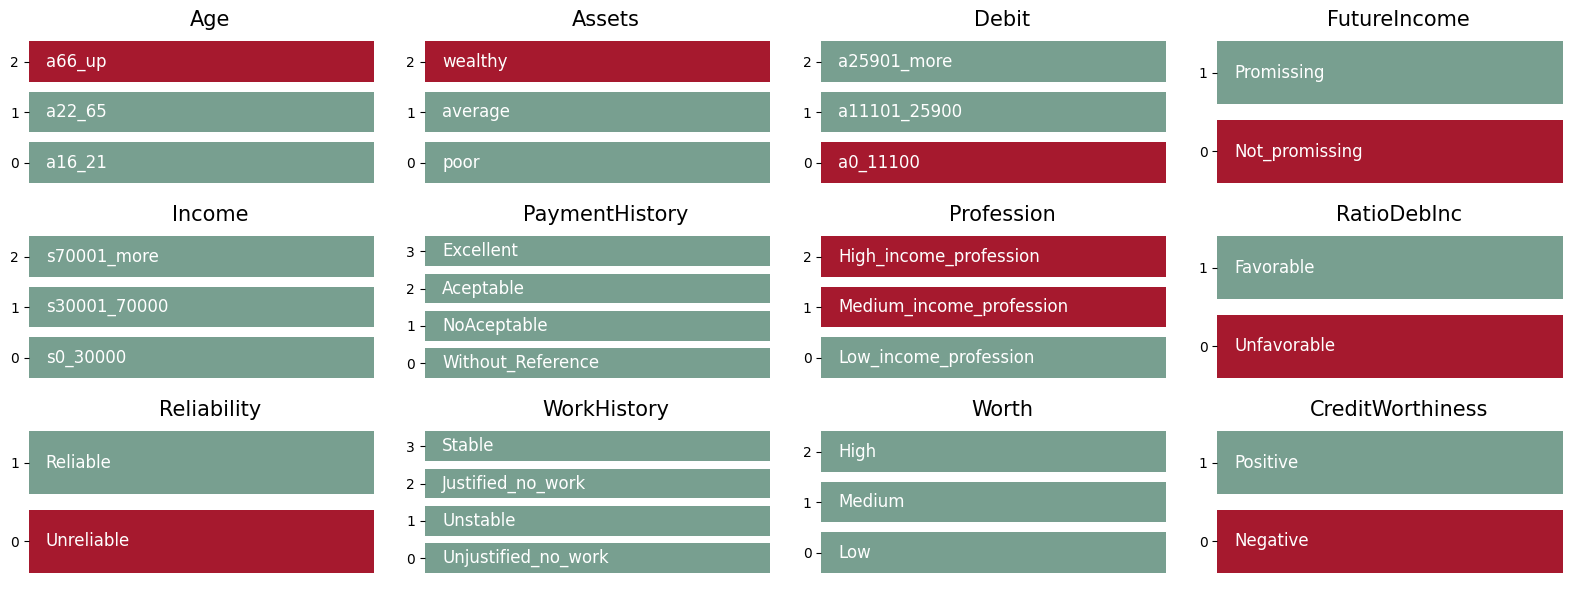

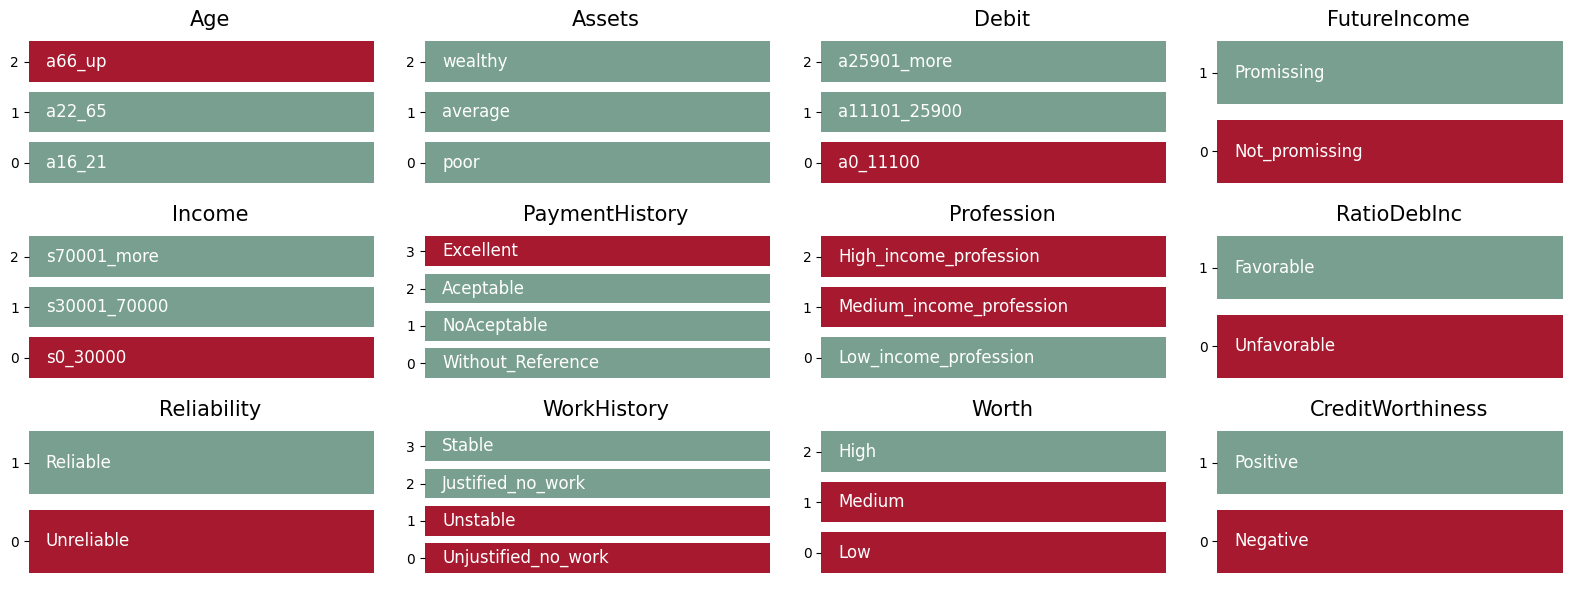

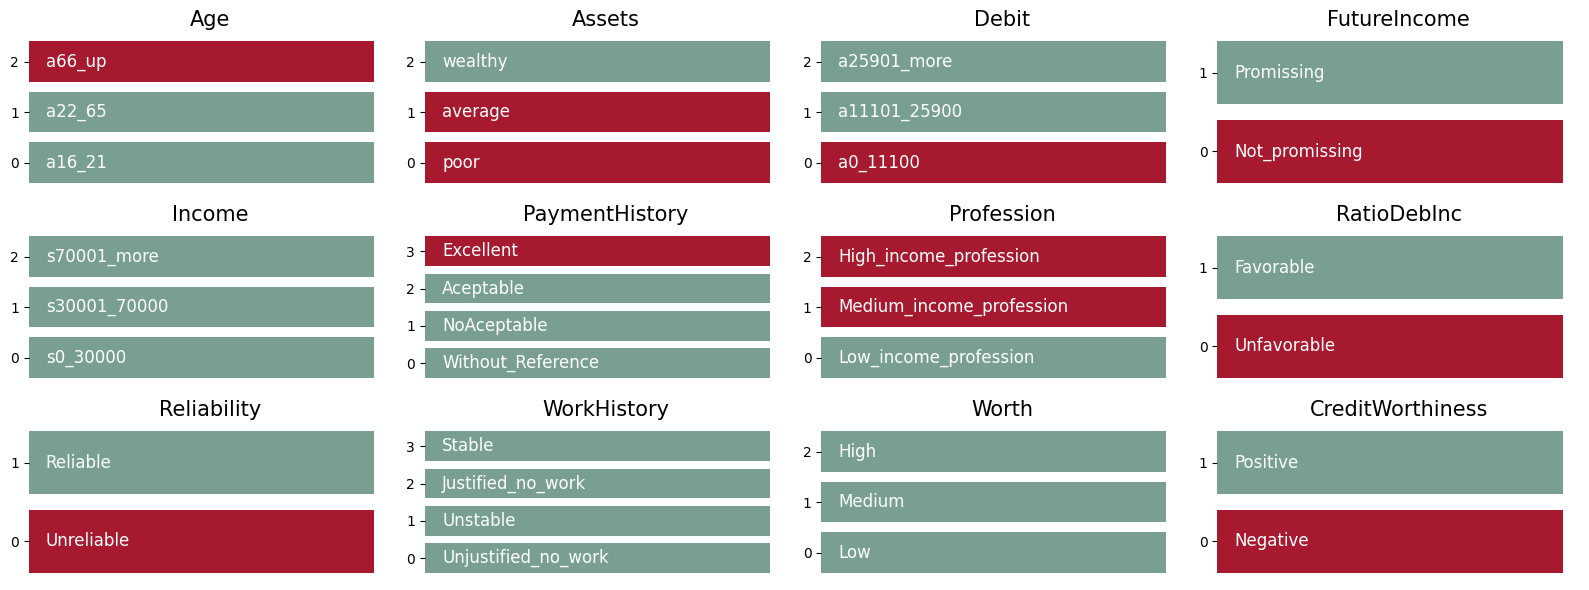

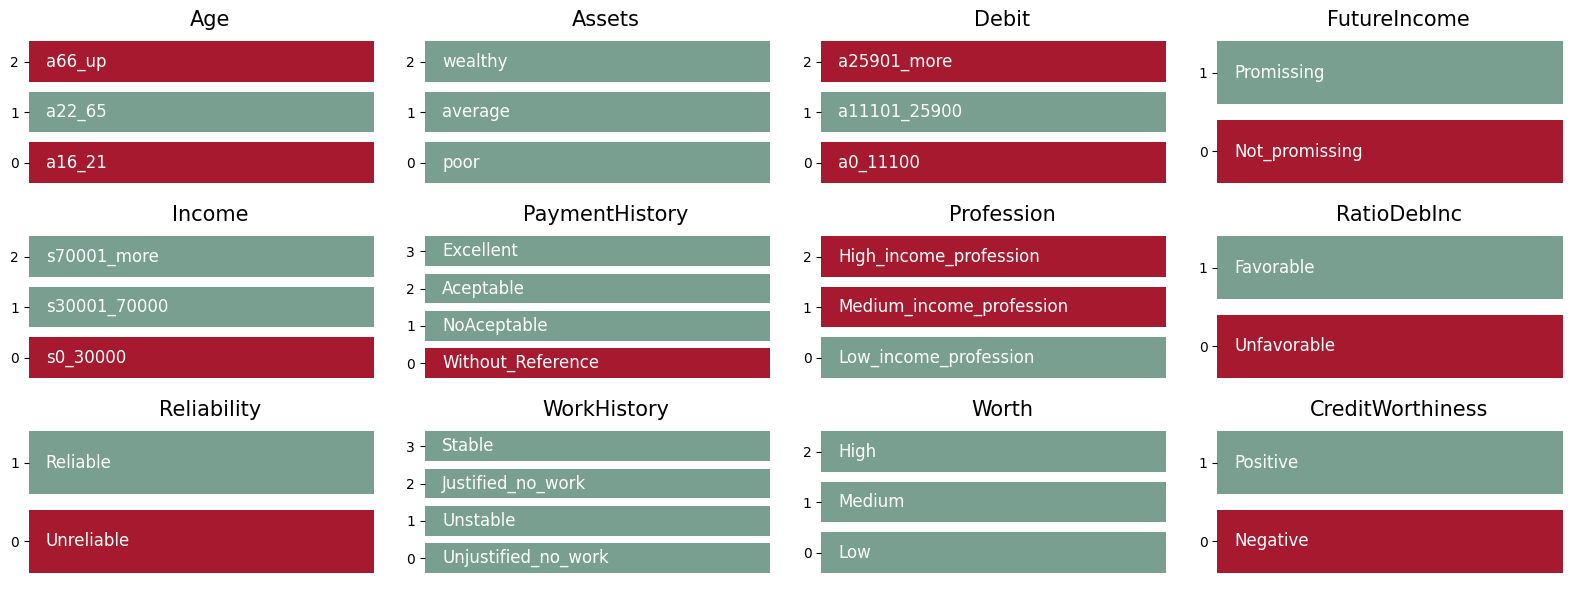

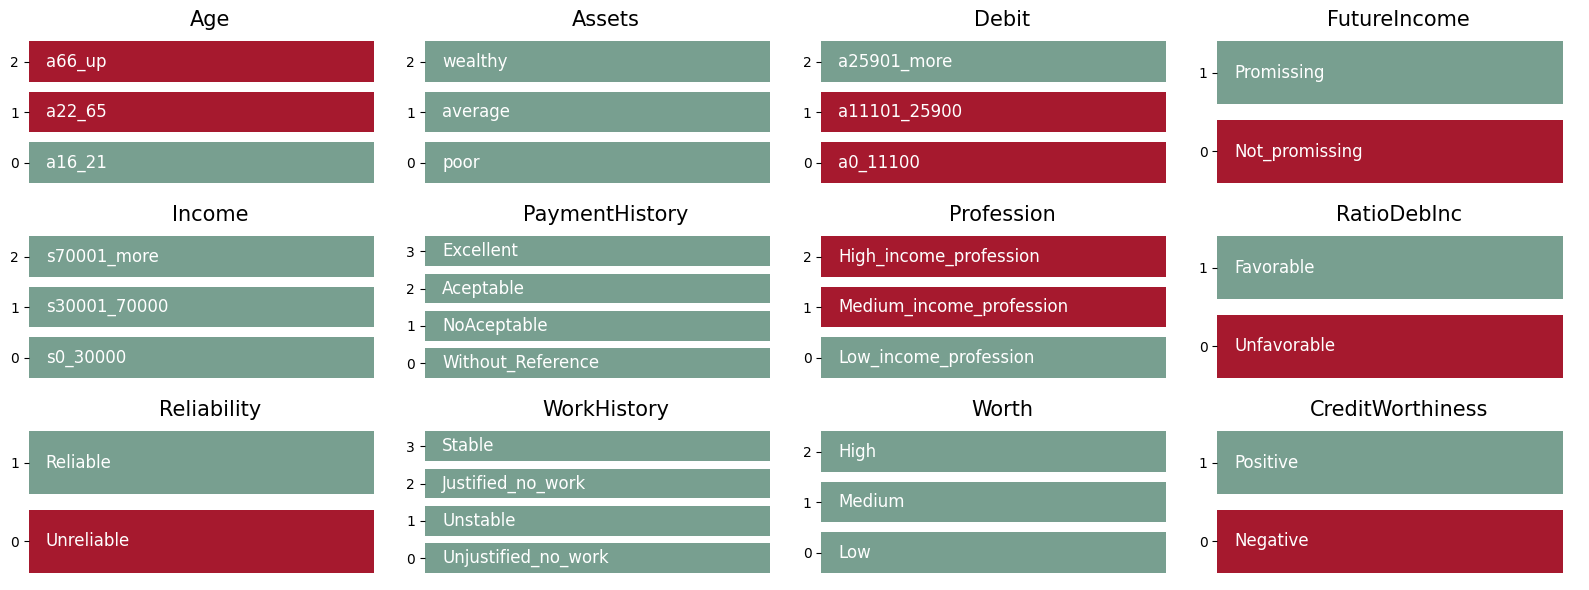

In [155]:
analyse_records(df, data, translation_table=translation_table, unsat=True, how_many=5)

In [107]:
example_rule = df[df['ifthen_UNSAT'] == True].reset_index().iloc[0].to_dict()

legal_values = translate_rule_to_set_of_legal_values(example_rule['rule'], 
                                                    TARGET_COL,
                                                    example_rule['class'], 
                                                    credit10k_translation_table)

data_with_preds = data.copy()
# data_with_preds['prediction'] = predictions

filtered_data = filter_out_region_of_a_rule(legal_values, data_with_preds)
filtered_data

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
112,Excellent,Unstable,Reliable,a11101_25900,s30001_70000,Favorable,poor,Medium,Low_income_profession,Promissing,a16_21,Positive
263,Without_Reference,Unstable,Reliable,a11101_25900,s30001_70000,Favorable,average,High,Low_income_profession,Promissing,a22_65,Positive
315,Aceptable,Unstable,Reliable,a11101_25900,s30001_70000,Favorable,average,High,Low_income_profession,Promissing,a16_21,Positive
395,Excellent,Unjustified_no_work,Reliable,a11101_25900,s30001_70000,Favorable,average,High,Low_income_profession,Promissing,a22_65,Positive
499,Without_Reference,Stable,Reliable,a11101_25900,s30001_70000,Favorable,poor,Medium,Low_income_profession,Promissing,a22_65,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
9120,Aceptable,Unjustified_no_work,Reliable,a25901_more,s70001_more,Favorable,poor,High,Low_income_profession,Promissing,a22_65,Positive
9207,Aceptable,Justified_no_work,Reliable,a11101_25900,s70001_more,Favorable,average,High,Low_income_profession,Promissing,a22_65,Positive
9212,Without_Reference,Justified_no_work,Reliable,a11101_25900,s70001_more,Favorable,average,High,Low_income_profession,Promissing,a16_21,Positive
9584,Aceptable,Stable,Reliable,a11101_25900,s70001_more,Favorable,average,High,Low_income_profession,Promissing,a16_21,Positive


In [144]:
def plot_counterfactuals(legal_values: dict[str, dict[str, list[str]]],
                      translation_table: dict[str, dict[str, int]],
                      coverage: int | None = None,
                      n: int | None = None,
                      save_name: str | None = None
                      ) -> None:

    
    fig, axs = plt.subplots(3, 4, figsize=(8, 6))
    
    fill_values = {}
    
    # Plot also all variables in translation table that are not in legal_values
    for col in translation_table.keys():
        if col not in legal_values.keys():
            legal_values[col] = {}
            legal_values[col]['allowed'] = [] # just a cheat to make the plot work
            
    
    axs = axs.flatten()
    columns = sorted(list(legal_values.keys()))
    # move target column to the end
    columns.remove(TARGET_COL)
    columns.append(TARGET_COL)
    
    blue = "#0082BA"
    # gray = "#D1CCBD"
    
    for i, col in enumerate(columns):
        labels = translation_table[col].keys()
        ticks = translation_table[col].values()
        
        colors = [blue if x in legal_values[col]['allowed'] else "gray" for x in labels]

        # Transpose the plot
        axs[i].barh(np.array(list(ticks)), np.ones(len(ticks)), color=colors)

        # hide ticks on x axis
        axs[i].xaxis.set_ticks([])

        # Set the ticks on y axis
        axs[i].set_yticks(np.array(list(ticks)))

        # Set the labels on y axis
        axs[i].set_yticklabels(["" for _ in ticks])

        # Remove the frame
        axs[i].set_frame_on(False)
        
        # # Add separation lines between plots
        # axs[i].axvline(x=1.5, color='black', linewidth=0.5, linestyle='--', ymax=1, ymin=0.2)
        
        # # Add horizontal line as separation
        # axs[i].axhline(y=-1, color='black', linewidth=0.5, linestyle='--', xmax=1, xmin=0)
        
        # Add title
        axs[i].set_title(col, fontsize=14)
        
        axs[i].tick_params(axis=u'both', which=u'both',length=0)
        
    title = f'Value assignments that break the rule.'
        
    # Add supertitle
    # fig.suptitle(title, fontsize=10)
    
    plt.savefig(os.path.join(ARTIFACTS_PATH, f'{save_name}.png'), dpi=300)
    plt.savefig(os.path.join(ARTIFACTS_PATH, f'{save_name}.eps'), dpi=300)
    

    plt.tight_layout()
    plt.show()

In [145]:
def analyse_SAT_record(
                    rules_df: pd.DataFrame,
                    data: pd.DataFrame,
                    index: int,
                    translation_table: dict[str, dict[str, int]],
                    plot: bool = True, 
                    print_rules: bool = False, 
                    show_covered_instances: bool = False,
                    how_many_cfs: int = 5,
                    ) -> None:

    rows = rules_df[rules_df['ifthen_UNSAT'] == False].reset_index()
    
    # sort by coverage 
    # rows = rows.sort_values(by='coverage', ascending=False)
    row = rows.reset_index().iloc[index]
        
    print(f'Number of all SAT models: {len(row["ifthen_All_SAT_Models"])}')
    sat_models = row['ifthen_All_SAT_Models'][:how_many_cfs]
        
        
    legal_values = translate_rule_to_set_of_legal_values(row['rule'], 
                                                        TARGET_COL,
                                                        row['class'], 
                                                        credit10k_translation_table)
    
    covered_instances = filter_out_region_of_a_rule(legal_values, data)
    
    if show_covered_instances:
        print(f'Covered instances: {len(covered_instances)}')

    if print_rules:
        # Print the legal values for each variable
        for var in legal_values.keys():
            print(f'Variable: {var}')
            print(f'Allowed values: {legal_values[var]["allowed"]}')
            print(f'Not allowed values: {legal_values[var]["notallowed"]}')
            print()
        
    if plot:
        plot_legal_values(legal_values, translation_table=translation_table,   
                            coverage=len(covered_instances), n=len(data), save_name=f'legal_values_SAT_{DATASET_NAME}_{ID}_{index}')
        
        
        for i, model in enumerate(sat_models):
            true_variables = transform_mdd_names_back(model['true_variables'])
            
            true_variables.append(f'{TARGET_COL}={1-row["class"]}th')
            
            _model_true_values = {}
            for var in true_variables:
                name = var.split('=')[0]
                value_numerical = var.split('=')[1].split('th')[0]
                value_str = list(filter(lambda x: int(x[1]) == int(value_numerical), translation_table[name].items()))[0][0]
                _model_true_values[name] = {}
                _model_true_values[name]['allowed'] = [value_str]
                
            print(f'Counterfactual {i+1}')
            print(true_variables)
            print(f'True variables - names: {_model_true_values}')
            plot_counterfactuals(_model_true_values, translation_table=translation_table, save_name=f'legal_values_SAT_{DATASET_NAME}_{ID}_{index}_{i}')

In [146]:
idx = 4
x = df['ifthen_All_SAT_Models'].iloc[idx]
print(x[1])
# print(df['rule'].iloc[idx])
breaking_vars = transform_mdd_names_back(x[1]['true_variables'])
unset_vars = transform_mdd_names_back(x[1]['false_variables'])
print(f'Breaking vars: {breaking_vars}')
print(f'Unset vars: {unset_vars}')
print(f'Class: {df["class"].iloc[idx]}')

{'true_variables': ['Node_Profession_1', 'Node_Debit_2', 'edge_1_2_(1_0)', 'x_1 = 0th value', 'Node_Age_3', 'edge_2_3_(2_0)', 'x_2 = 0th value', 'Node_FALSE_10', 'edge_3_10_(3_1)', 'x_3 = 1th value'], 'false_variables': ['Node_Debit_5', 'edge_1_5_(1_1)', 'x_1 = 1th value', 'Node_Debit_8', 'edge_1_8_(1_2)', 'x_1 = 2th value', 'Node_Age_4', 'edge_2_4_(2_1)', 'x_2 = 1th value', 'edge_2_4_(2_2)', 'x_2 = 2th value', 'edge_3_10_(3_0)', 'x_3 = 0th value', 'Node_TRUE_9', 'edge_3_9_(3_2)', 'x_3 = 2th value', 'edge_4_9_(4_0)', 'edge_4_9_(4_1)', 'edge_4_9_(4_2)', 'Node_Age_6', 'edge_5_6_(5_0)', 'edge_5_3_(5_1)', 'Node_Age_7', 'edge_5_7_(5_2)', 'edge_6_10_(6_0)', 'edge_6_10_(6_1)', 'edge_6_10_(6_2)', 'edge_7_9_(7_0)', 'edge_7_10_(7_1)', 'edge_7_9_(7_2)', 'edge_8_6_(8_0)', 'edge_8_6_(8_1)', 'edge_8_6_(8_2)']}
Breaking vars: ['Profession=0th', 'Debit=0th', 'Age=1th']
Unset vars: ['Debit=1th', 'Debit=1th', 'Age=0th', 'Age=0th', 'Age=0th']
Class: 1


Number of all SAT models: 2


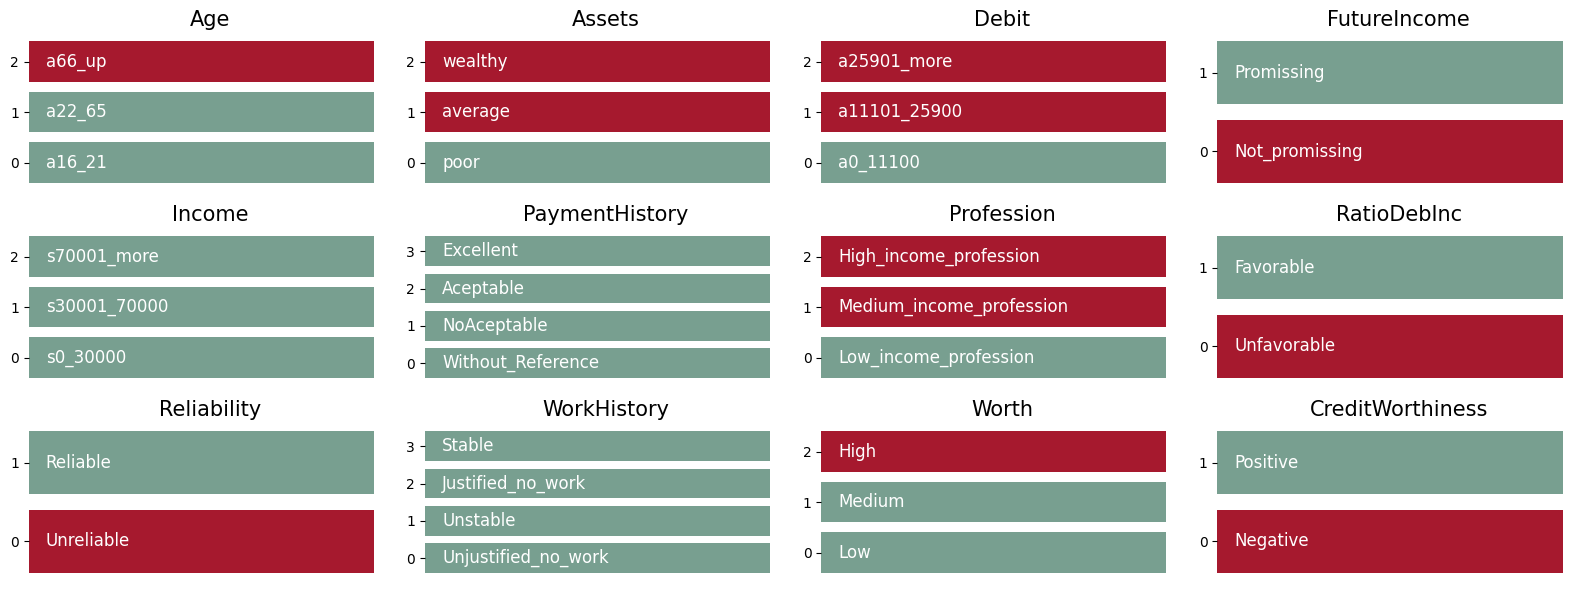

Counterfactual 1
['Profession=0th', 'Debit=0th', 'Age=0th', 'CreditWorthiness=0th']
True variables - names: {'Profession': {'allowed': ['Low_income_profession']}, 'Debit': {'allowed': ['a0_11100']}, 'Age': {'allowed': ['a16_21']}, 'CreditWorthiness': {'allowed': ['Negative']}}


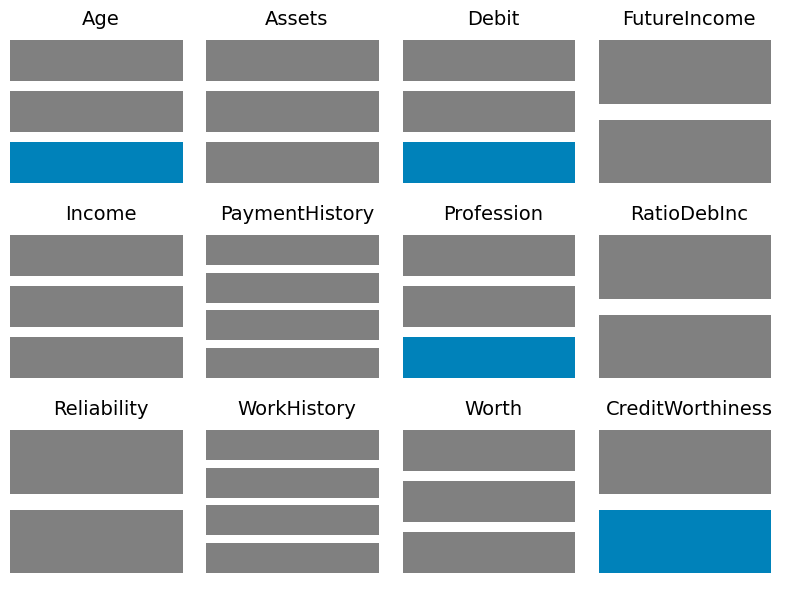

Counterfactual 2
['Profession=0th', 'Debit=0th', 'Age=1th', 'CreditWorthiness=0th']
True variables - names: {'Profession': {'allowed': ['Low_income_profession']}, 'Debit': {'allowed': ['a0_11100']}, 'Age': {'allowed': ['a22_65']}, 'CreditWorthiness': {'allowed': ['Negative']}}


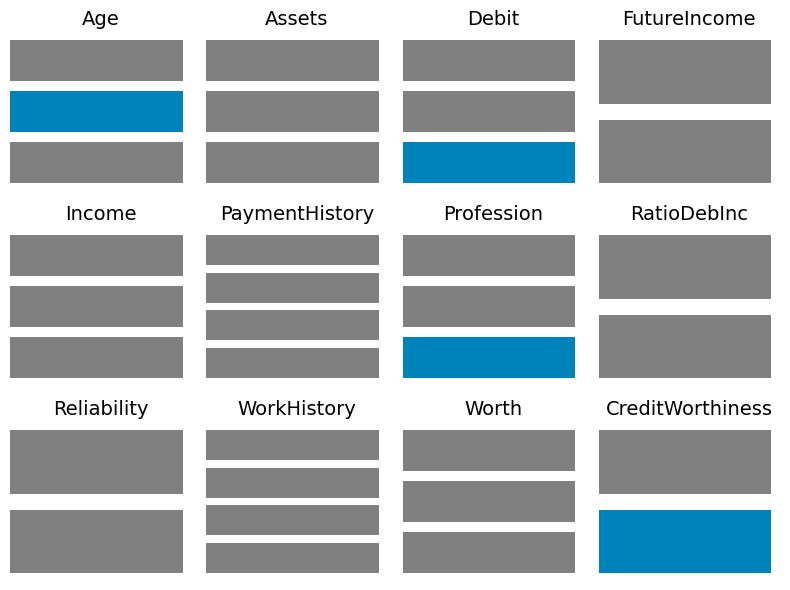

In [147]:
analyse_SAT_record(df, data, 1, translation_table=translation_table)

In [ ]:
# print stats of how many rules are SAT and UNSAT
print(f'Number of SAT rules: {len(df[df["ifthen_UNSAT"] == False])}')
print(f'Number of UNSAT rules: {len(df[df["ifthen_UNSAT"] == True])}')